In [1]:
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

In [5]:
file_path = '../../datasets/expunations_annotated_full.json'  # Update this with the correct file path if needed
with open(file_path, 'r') as f:
    dataset = json.load(f)

data = pd.json_normalize(dataset)

In [7]:
#how many entries are rated to be a joke
data['Joke_Count'] = data['Is a Joke?'].apply(lambda x: sum(x))  
#average of the funniness ratings for each joke
data['Avg_Funniness'] = data['Funniness (1-5)'].apply(lambda x: sum(x) / len([i for i in x if i != 0]) if sum(x) > 0 else 0)
#how many entries are rated to be understandable
data['Understand_Text_Count'] = data['Understand the text?'].apply(sum)

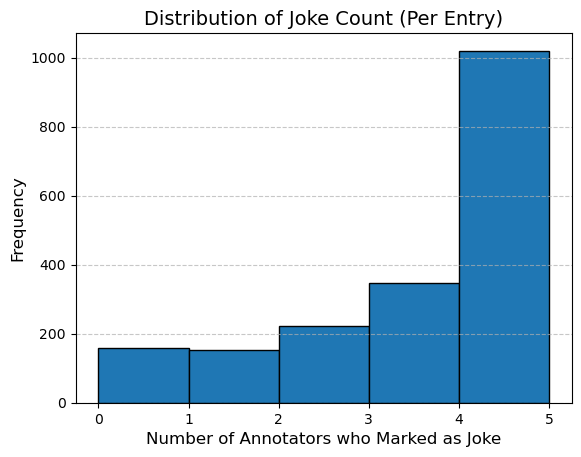

In [22]:
plt.hist(data['Joke_Count'], bins=range(6), edgecolor='black')
plt.title('Distribution of Joke Count (Per Entry)', fontsize=14)
plt.xlabel('Number of Annotators who Marked as Joke', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Based on these results, we can see an overwhelming percentage of the dataset has been rated as a joke by a majority of the evaluators. Conversely, there are very few negative examples.

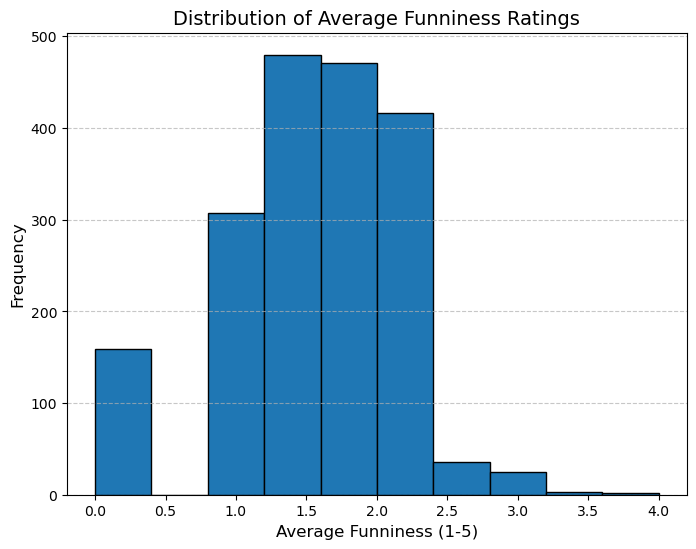

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(data['Avg_Funniness'], bins=10, edgecolor='black')
plt.title('Distribution of Average Funniness Ratings', fontsize=14)
plt.xlabel('Average Funniness (1-5)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The jokes contained in the dataset may not be the funniest. However, puns have a reputation of being unfunny. Perhaps the judges were biased in their ratings.

In [16]:
all_keywords = [
    word for keywords_list in data['Joke keywords'].dropna() for sublist in keywords_list for word in sublist
    if word.strip()
]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_keywords))

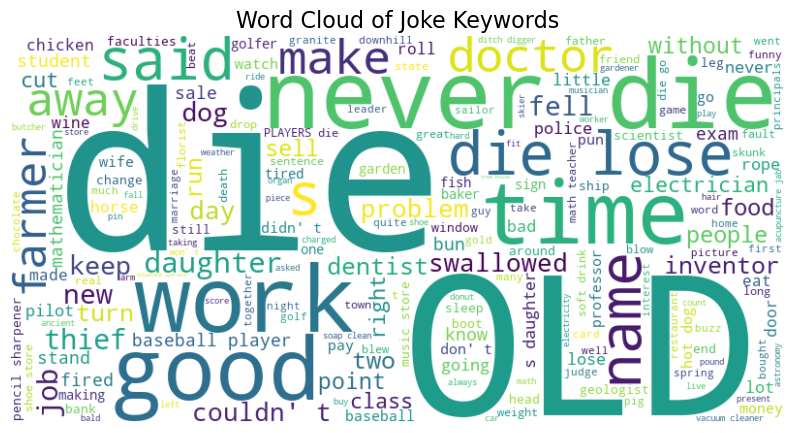

In [17]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Joke Keywords', fontsize=16)
plt.show()

Themes of death, old age, and work appear to be most prominent in the dataset. 

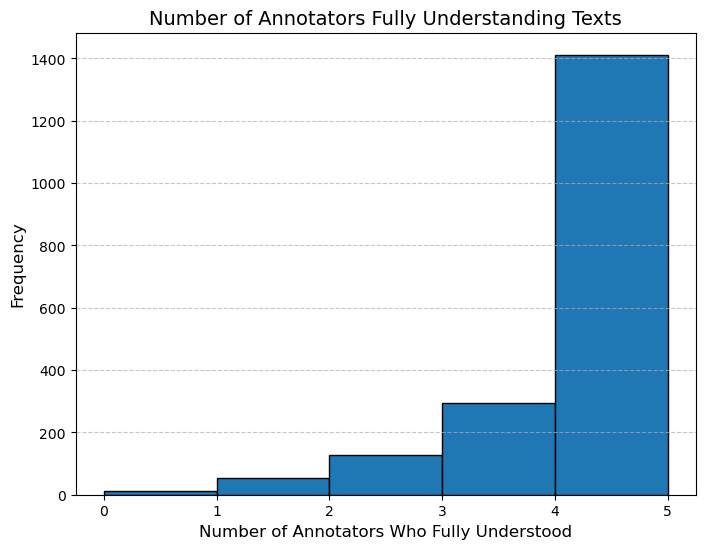

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(data['Understand_Text_Count'], bins=range(6), edgecolor='black')
plt.title('Number of Annotators Fully Understanding Texts', fontsize=14)
plt.xlabel('Number of Annotators Who Fully Understood', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Luckily, most of the puns in the dataset are understood by the judges.